In [49]:
%reload_ext nb_black

from datetime import datetime as dt

%matplotlib inline

import pandas as pd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
# load the datasets

web_df = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv"
)

life_df = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/life_expectancy.csv"
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
web_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


<IPython.core.display.Javascript object>

In [54]:
web_df["timestamp"] = pd.to_datetime(web_df["timestamp"], unit="ms")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
web_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN


<IPython.core.display.Javascript object>

In [46]:
web_df["year"] = web_df["timestamp"].dt.year
web_df["month"] = web_df["timestamp"].dt.month
web_df["day"] = web_df["timestamp"].dt.day
web_df["hour"] = web_df["timestamp"].dt.hour
web_df["minute"] = web_df["timestamp"].dt.minute
web_df["second"] = web_df["timestamp"].dt.second
web_df["ms"] = (web_df["timestamp"].dt.microsecond / 1000).astype(int)

<IPython.core.display.Javascript object>

In [47]:
web_df.head()

,timestamp,visitorid,event,itemid,transactionid,year,month,day,hour,minute,second,ms
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015,6,2,5,2,12,117
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015,6,2,5,50,14,164
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015,6,2,5,13,19,827
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015,6,2,5,12,35,914
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015,6,2,5,2,17,106


<IPython.core.display.Javascript object>

In [40]:
web_df["month"].value_counts()

7    697984
6    610393
5    590652
8    553362
9    303710
Name: month, dtype: int64

<IPython.core.display.Javascript object>

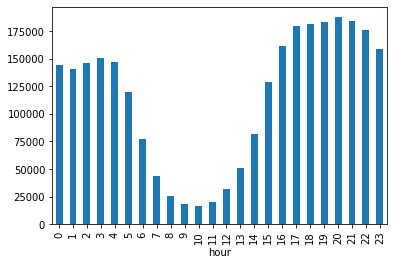

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
web_df.groupby("hour").count()["event"].plot(kind="bar")

In [55]:
new_df = web_df.copy()

new_df["timestamp"] = new_df["timestamp"].dt.round("H")

new_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:00:00,257597,view,355908,NaN
1,2015-06-02 06:00:00,992329,view,248676,NaN
2,2015-06-02 05:00:00,111016,view,318965,NaN
3,2015-06-02 05:00:00,483717,view,253185,NaN
4,2015-06-02 05:00:00,951259,view,367447,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
new_df["hour"] = new_df["timestamp"].dt.hour
new_df["year"] = new_df["timestamp"].dt.year
new_df["month"] = new_df["timestamp"].dt.month
new_df["day"] = new_df["timestamp"].dt.day

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
new_df.head()

,timestamp,visitorid,event,itemid,transactionid,hour,year,month,day
0,2015-06-02 05:00:00,257597,view,355908,NaN,5,2015,6,2
1,2015-06-02 06:00:00,992329,view,248676,NaN,6,2015,6,2
2,2015-06-02 05:00:00,111016,view,318965,NaN,5,2015,6,2
3,2015-06-02 05:00:00,483717,view,253185,NaN,5,2015,6,2
4,2015-06-02 05:00:00,951259,view,367447,NaN,5,2015,6,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

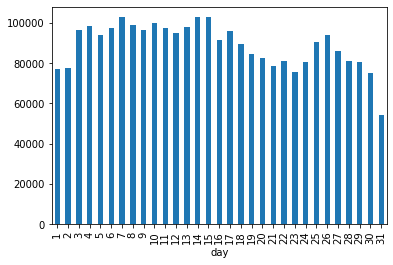

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
new_df.groupby("day").count()["event"].plot(kind="bar")

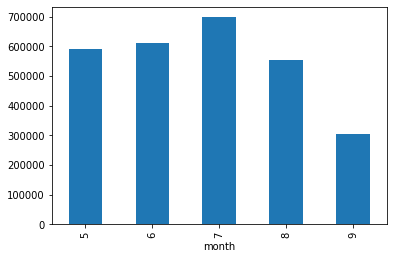

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
new_df.groupby("month").count()["event"].plot(kind="bar")

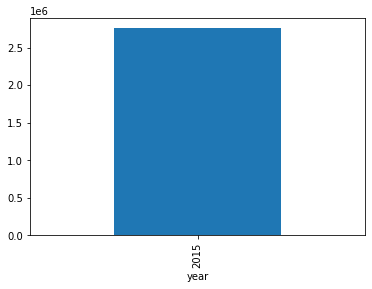

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
new_df.groupby("year").count()["event"].plot(kind="bar")

In [64]:
life_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Load the web_events.csv data set into a Pandas dataframe.
* Convert the values in the timestamp field to datetimes.
* Extract different time units from the timestamp field.
* Aggregate on each one, counting the number of records, and see what insights you can discover for each type of event.
* Round datetimes by hour, aggregate, and see what insights you can discover.
* Load the life_expectancy.csv data set into a Pandas dataframe.
* Transform/melt the data so that the years are listed in a single column instead of separate columns.
* Practice address missing values for countries using the different approaches (imputation, interpolation, and deletion).

In [65]:
ids = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
melt_fields = set(life_df.columns) - set(ids)

melted = pd.melt(
    life_df, id_vars=ids, value_vars=melt_fields, var_name="Year", value_name="Value"
)

melted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1987,73.325
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1987,47.288
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1987,41.382
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1987,71.760
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1987,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
melted[melted["Country Name"] == "American Samoa"].sort_values("Year")

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
2385,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN
5553,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,NaN
9249,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,NaN
11097,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,NaN
1065,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,NaN
4233,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1965,NaN
13737,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1966,NaN
6873,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1967,NaN
9777,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1968,NaN
3969,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1969,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
null_co = melted[melted["Value"].isna()]["Country Name"].unique()
co_list = []

for country in null_co:
    if melted[melted["Country Name"] == country].isna().mean()["Value"] == 1:
        co_list.append(country)

co_list

['Andorra',
 'American Samoa',
 'Gibraltar',
 'Not classified',
 'Monaco',
 'Northern Mariana Islands',
 'Nauru',
 'Turks and Caicos Islands',
 'Tuvalu',
 'British Virgin Islands']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
melted = melted[~melted["Country Name"].isin(co_list)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
null_co = melted[melted["Value"].isna()]["Country Name"].unique()
null_co

array(['Bermuda', 'Curacao', 'Cayman Islands', 'Isle of Man',
       'Liechtenstein', 'Palau', 'West Bank and Gaza', 'San Marino',
       'Serbia', 'Sint Maarten (Dutch part)', 'Dominica',
       'St. Kitts and Nevis', 'Marshall Islands', 'Faroe Islands',
       'Greenland', 'Israel', 'St. Martin (French part)', 'Seychelles',
       'Kosovo'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
melted[melted["Country Name"] == "Bermuda"].sort_values("Year").fillna(method="bfill")

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
2401,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,68.897805
5569,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,68.897805
9265,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,68.897805
11113,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,68.897805
1081,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,68.897805
4249,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1965,68.897805
13753,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1966,70.290000
6889,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1967,70.290000
9793,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1968,70.290000
3985,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1969,70.290000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
melted.loc[:, "Country Name" == "Bermuda"]

KeyError: False

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>